In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.io import imshow,imread
from skimage.transform import downscale_local_mean
from google.colab import drive
drive.mount('/content/drive')
image_path = '/content/drive/MyDrive/cow.jpeg'
#Down-sample N-dimensional image by local averaging.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


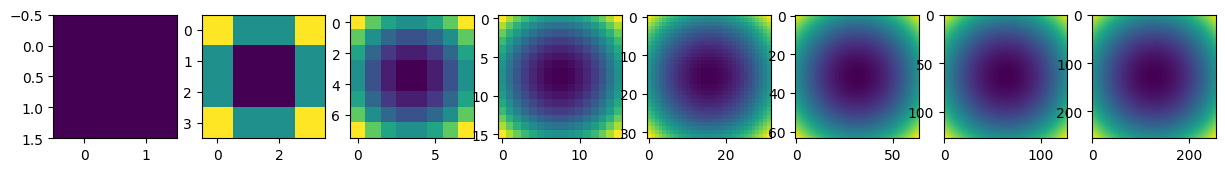

In [ ]:
def circle(x,y): #defining a circle using two coordinates
  X,Y=np.meshgrid(x,y)
  return X**2 + Y**2

factors=2**np.arange(1,9)
fig,ax=plt.subplots(1,len(factors),figsize=(15,2))

#iterating through the figures and axes
for i,j in enumerate(factors):
  image=circle(np.linspace(-1,1,j),np.linspace(-1,1,j))
  ax[i].imshow(image)

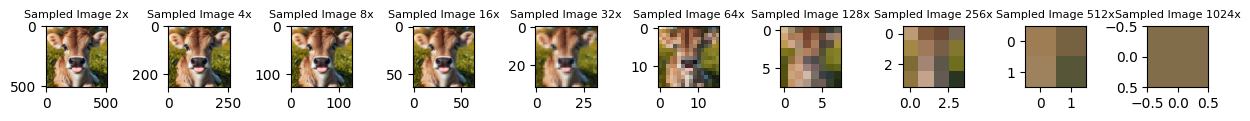

In [ ]:
#using only python and numpy and the skimage library of python
image = imread(image_path)  # this reads the image file and stores it in the variable image
factors = 2 ** np.arange(1, 11)  # this will create a list of factors [2,4,8,16,...] as np.arange(1,5) gives a list of [1,2,3,4]

#creating a figure with multiple subplots
fig,ax=plt.subplots(1,len(factors),figsize=(15,2))
#this makes as many subplots as there are elements in the list factors

for x,y in zip(factors,ax):
  im=downscale_local_mean(image,factors=(x,x,1)).astype(int)
  y.set_title(f'Sampled Image {x}x', fontsize=8)
  y.imshow(im)
  #each im is a downsampled image with factors 2x

plt.subplots_adjust(wspace=1)

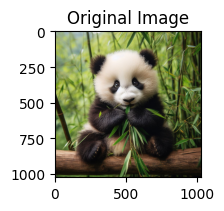

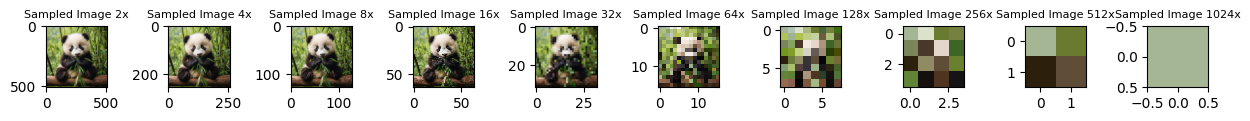

In [ ]:
#using  methods like nearest neighbor and bilinear interpolation
def image_sampling(image, factor, method='nearest'):    #the default method given by the user is nearest neaighbor interpolation
   if method=='nearest':
    return cv2.resize(image, (image.shape[1]//factor,image.shape[0]//factor), interpolation=cv2.INTER_NEAREST)
   elif method=='bilinear':
    return cv2.resize(image,(image.shape[1]//factor,image.shape[0]),interpolation=cv2.INTER_BILINEAR)
   else:
    raise ValueError("Invalid sampling method")



#uploading the original image from the g-drive
actual_image=cv2.imread('/content/drive/MyDrive/panda.jpeg')

#showing the actual image
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(actual_image, cv2.COLOR_BGR2RGB))


#plottting the sampled down images downsampled  with nearest neighbor interpolation
samples=2**np.arange(1,11)
figures,axes=plt.subplots(1,len(samples),figsize=(15,2))


for factor,ax in zip(samples,axes):
  downsampled_image=image_sampling(actual_image,factor,method='nearest')
  ax.set_title(f'Sampled Image {factor}x',fontsize=8)
  ax.imshow(cv2.cvtColor(downsampled_image, cv2.COLOR_BGR2RGB))

plt.subplots_adjust(wspace=1)

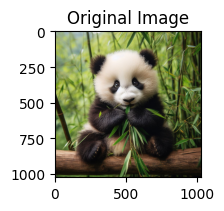

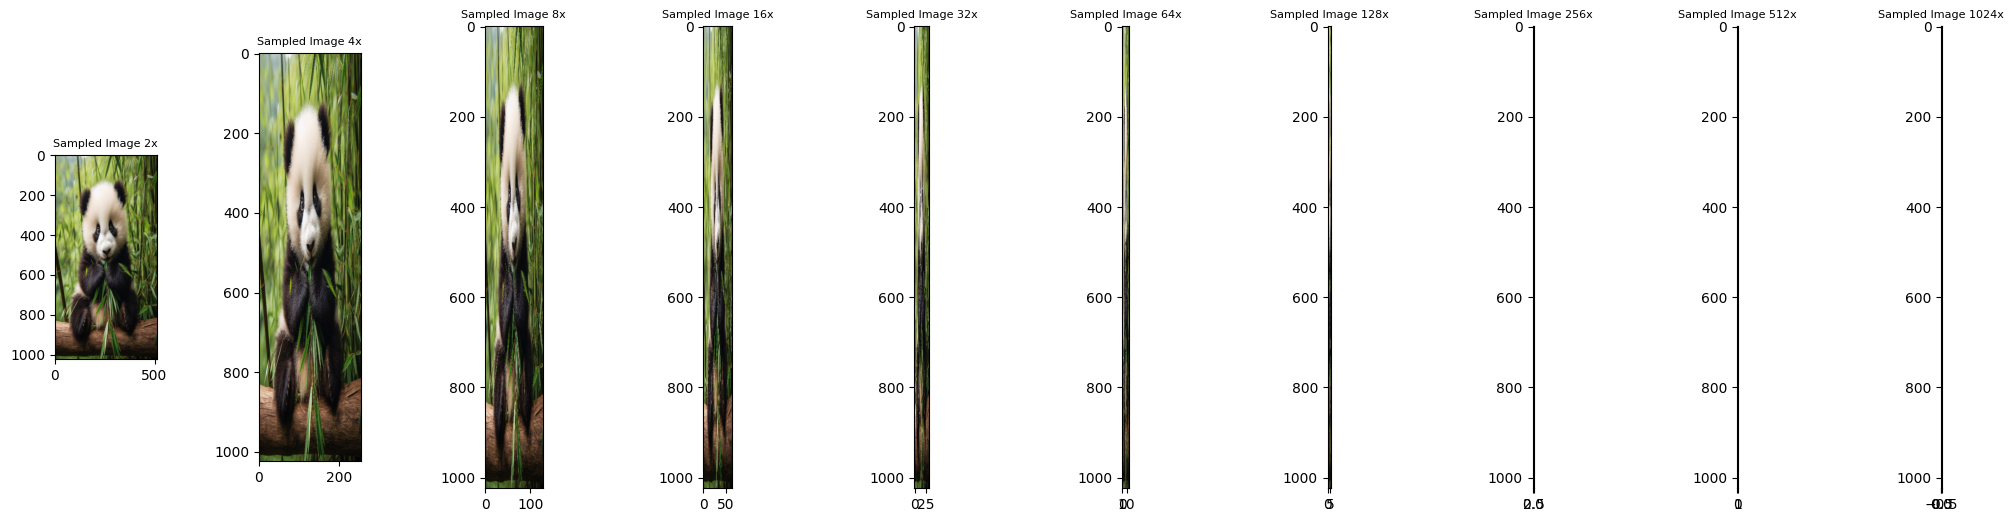

In [ ]:
#using  methods like nearest neighbor and bilinear interpolation
def image_sampling(image, factor, method='nearest'):    #the default method given by the user is nearest neaighbor interpolation
   if method=='nearest':
    return cv2.resize(image, (image.shape[1]//factor,image.shape[0]//factor), interpolation=cv2.INTER_NEAREST)
   elif method=='bilinear':
    return cv2.resize(image,(image.shape[1]//factor,image.shape[0]),interpolation=cv2.INTER_LINEAR)
   else:
    raise ValueError("Invalid sampling method")



#uploading the original image from the g-drive
actual_image=cv2.imread('/content/drive/MyDrive/panda.jpeg')

#showing the actual image
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(actual_image, cv2.COLOR_BGR2RGB))


#plottting the sampled down images downsampled  with bilinear interpolation
samples=2**np.arange(1,11)
figures,axes=plt.subplots(1,len(samples),figsize=(25,6))


for factor,ax in zip(samples,axes):
  downsampled_image=image_sampling(actual_image,factor,method='bilinear')
  ax.set_title(f'Sampled Image {factor}x',fontsize=8)
  ax.imshow(cv2.cvtColor(downsampled_image, cv2.COLOR_BGR2RGB))

plt.subplots_adjust(wspace=1)